In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
data_path = 'annonces_expat_dakar_pagination.xlsx'
df = pd.read_excel(data_path, sheet_name='Sheet1')

In [5]:
# Display the first 5 rows of the dataframe
print(df.head())

                                 Titre        Prix                    Adresse  \
0  Range Rover sport 2017 Full options  22900000.0                  VDN Dakar   
1                      Hyundai Elantra   6600000.0               Mermoz Dakar   
2                      Hyundai Elantra   6600000.0               Mermoz Dakar   
3                  Mercedes-Benz  1997   3500000.0  Parcelles Assainies Dakar   
4                    KIA SORENTO  2016   8900000.0           Sacré-cœur Dakar   

          Marque       Modèle        Etat Transmission  Année Modèle  \
0     Land Rover  Range Rover      Venant  Automatique        2017.0   
1        Hyundai      Elantra        Neuf  Automatique        2018.0   
2        Hyundai      Elantra        Neuf  Automatique        2020.0   
3  Mercedes-Benz          NaN  D'occasion     Manuelle        1997.0   
4            Kia      Sorento      Venant  Automatique        2016.0   

  Carburant        Carrosserie  Kilométrage Caractéristiques  
0    Diesel      

In [6]:
# Display the information of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6446 entries, 0 to 6445
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Titre             6314 non-null   object 
 1   Prix              6187 non-null   float64
 2   Adresse           6185 non-null   object 
 3   Marque            5221 non-null   object 
 4   Modèle            3709 non-null   object 
 5   Etat              5637 non-null   object 
 6   Transmission      4895 non-null   object 
 7   Année Modèle      5222 non-null   float64
 8   Carburant         5082 non-null   object 
 9   Carrosserie       4939 non-null   object 
 10  Kilométrage       3741 non-null   float64
 11  Caractéristiques  2296 non-null   object 
dtypes: float64(3), object(9)
memory usage: 604.4+ KB
None


In [8]:
df['Prix'] = df['Prix'].str.replace('\u202f', '').str.replace(' F Cfa', '').str.replace(' ', '').astype(float)

AttributeError: Can only use .str accessor with string values!

In [4]:
# Extract numerical values from Kilométrage
df['Kilométrage'] = df['Kilométrage'].str.replace(' km', '').str.replace(',', '').astype(float)

In [9]:
# Drop rows with missing target or features
df = df.dropna(subset=['Prix', 'Kilométrage', 'Année Modèle'])

In [10]:
# Convert categorical features to dummy variables
df = pd.get_dummies(df, columns=['Marque', 'Modèle', 'Etat', 'Transmission', 'Carburant', 'Carrosserie'], drop_first=True)


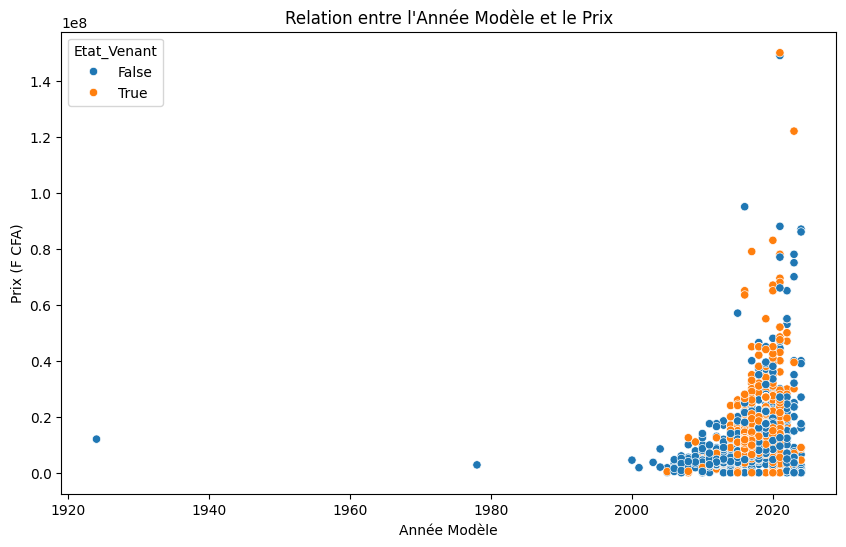

In [11]:
# EDA: Visualizing relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Année Modèle', y='Prix', hue='Etat_Venant')
plt.title('Relation entre l\'Année Modèle et le Prix')
plt.xlabel('Année Modèle')
plt.ylabel('Prix (F CFA)')
plt.show()

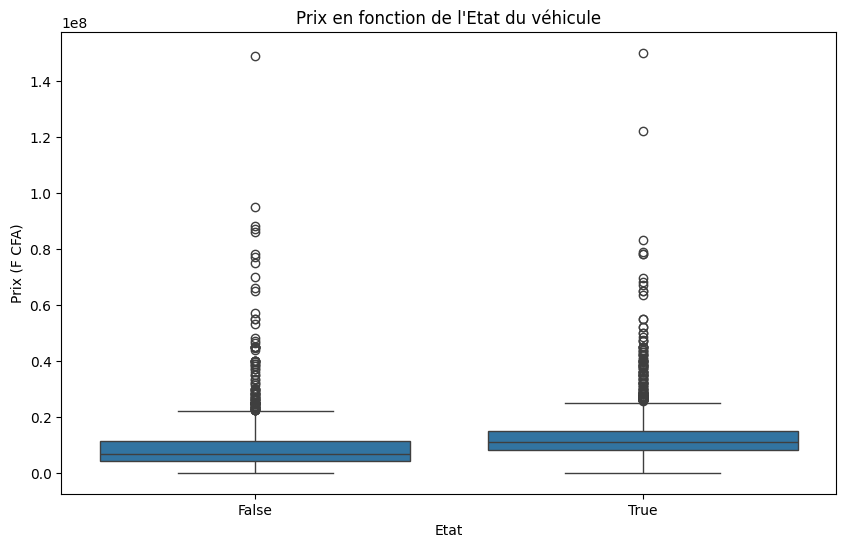

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Etat_Venant', y='Prix')
plt.title('Prix en fonction de l\'Etat du véhicule')
plt.xlabel('Etat')
plt.ylabel('Prix (F CFA)')
plt.show()

In [13]:
# Splitting the dataset
X = df.drop(columns=['Prix', 'Titre', 'Adresse', 'Caractéristiques'])
y = df['Prix']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Model Testing
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {'MSE': mse, 'R2': r2}

In [15]:
# Select the best model
best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model = models[best_model_name]

In [18]:
# Save the best model
model_path = 'best_model_vehicules.pkl'
joblib.dump(best_model, model_path)

['best_model_vehicules.pkl']

In [19]:

# Display results
print(f"Best Model: {best_model_name}")
print("Performance Metrics:")
for name, metrics in results.items():
    print(f"{name}: MSE = {metrics['MSE']:.2f}, R2 = {metrics['R2']:.2f}")


Best Model: Random Forest
Performance Metrics:
Linear Regression: MSE = 5783735010353924225892352.00, R2 = -52089466132.10
Random Forest: MSE = 45452243059765.41, R2 = 0.59
